# 확률적 경사하강법(Stochastic Gradient Descent)

<img src="./image/sgd.png"> 

- 의의
    - 훈련 세트에서 샘플을 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘
    - 샘플을 하나씩 사용하지 않고 여러 개를 사용하면 미니배치 경사하강법
    - 한 번에 저네 샘플을 사용하면 배치 경사하강법
- 손실 함수(loss function)
    - 확률적 경사하강법이 최적화할 대상
    - 어떤 문제에서 머신러닝 알고리즘이 얼마나 실제값과 오차가 나는지 측정하는 기준
    - 손실 함수의 최솟값을 알 수 없기 때문에 조금씩 찾아가는 과정이 확률적 경사하강법
- 에포크(epoch)
    - 손실 함수 값을 줄여나가는 과정에서 훈련 세트를 모두 사용하고도 만족할만한 결과에 도달하지 못했다면 다시 처음부터 훈련 세트를 사용함
    - 이렇게 훈련 세트를 한번 모두 사용하는 과정을 에포크라고 부름
    - 일반적으로 수십 번에서 수백 번 이상 에포크를 수행
- 특징
    - 샘플 데이터셋에 대해서만 경사를 계산하기 때문에 다루는 데이터가 줄어서 학습 속도가 빠르고 메모리 소모량이 작으며, 큰 데이터셋도 학습이 가능함
    - 학습 과정에 진폭이 크고 배치 경사하강법보다 불안정하게 움직임

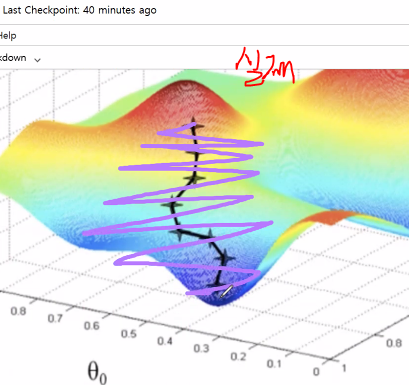

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier # 선형모델에 경사하강법을 많이 적용한다

In [7]:
df = pd.read_csv("./data/Fish.csv")

In [9]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [10]:
x = df.drop(["Species","Length1"], axis = 1)
y = df["Species"]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    stratify = y, 
    test_size = 0.25,
    random_state = 33
)

In [40]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [41]:
sgd = SGDClassifier(
    loss = "log_loss", # 
    max_iter = 10,  # 10에포크
    random_state = 33 # train data 와 같이 맞춰주는게 아님(실험통제)
   )

- SGDClassifier 의 매개변수
- loss : 손실 함수의 종류를 지정
- log_loss : 로지스틱 손실 함수
- max_iter : 수행할 최대 에포크 횟수

In [42]:
sgd.fit(scaled_train, y_train)
print(sgd.score(scaled_train, y_train))
print(sgd.score(scaled_test, y_test)) # 과소적합이 되었다

0.8151260504201681
0.875


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


# 모델을 수렴시켜야한다...
- ConvergenceWarning : 모델이 충분히 수렴하지 않았음을 알리는 경고

- 확률적 경사하강법은 점진적 학습이 가능함

- SGDClassifier 객체를 다시 만들지 않고 기존 모델을 추가로 훈련하는 것이 가능

In [43]:
# 점진적 학습
sgd.partial_fit(scaled_train, y_train)
print(sgd.score(scaled_train, y_train))
print(sgd.score(scaled_test, y_test))

0.7310924369747899
0.775


## 에포크와 과적합

- 에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습하고 과소적합이 일어날 수 있음
- 에프크 횟수가 많으면 모델이 훈련 세트를 과도하게 학습하고 과대적합이 일어날 수 있음
- 훈련 세트 점수는 에포크가 진행될 수록 꾸준히 증가하지만 테스트 세트 점수는 어느 순간 감소하기 시작함
    - 테스트 세트 저뭇가 감소하는 지점이 과대적합이 시작되는 지점
    - 과대적합이 시작하기 전에 훈련을 멈추는 것을 조기종료 라고 함

In [44]:
sgd = SGDClassifier(
    loss = "log_loss",
    random_state = 33
)

train_score = []
test_score = []

classes = np.unique(y_train)

In [45]:
for _ in range(300):
    sgd.partial_fit(
        scaled_train, y_train, classes = classes
    )
    train_score.append(sgd.score(scaled_train, y_train))
    test_score.append(sgd.score(scaled_test, y_test))

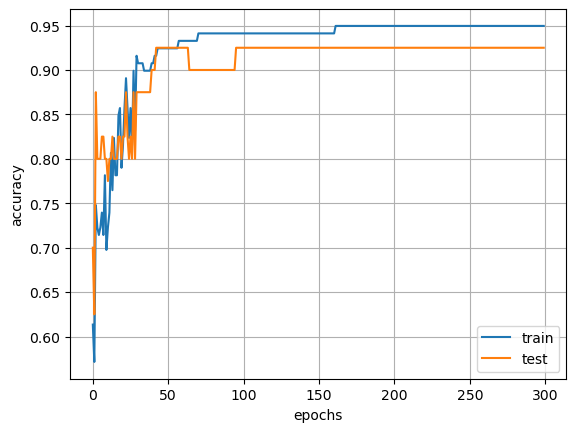

In [49]:
plt.figure()
plt.plot(train_score, label = "train")
plt.plot(test_score, label = "test")

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid()
plt.legend()
plt.show()

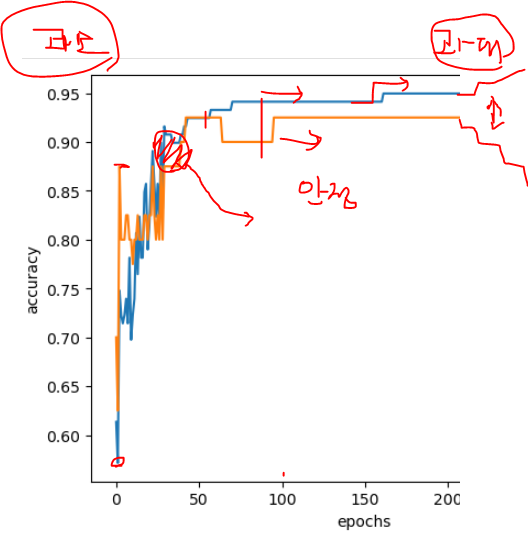

- 결과 100 이나 150이 좋은 에포크라고 판단

In [51]:
sgd = SGDClassifier(
    loss = "log_loss", # default hinge , log_loss 로지스틱회귀를 쓰겠다
    max_iter = 100,  # 100에포크
    random_state = 33, # train data 와 같이 맞춰주는게 아님(실험통제)
    tol = None, # 이 친구가 알아서 보정치를 넣어줌
   )

sgd.fit(scaled_train, y_train)
print(sgd.score(scaled_train, y_train))
print(sgd.score(scaled_test, y_test))

0.8907563025210085
0.825


In [52]:
sgd = SGDClassifier(
    loss = "hinge", # default hinge , log_loss 로지스틱회귀를 쓰겠다
    max_iter = 100,  # 100에포크
    random_state = 33, # train data 와 같이 맞춰주는게 아님(실험통제)
    tol = None, # 이 친구가 알아서 보정치를 넣어줌
   )

sgd.fit(scaled_train, y_train)
print(sgd.score(scaled_train, y_train))
print(sgd.score(scaled_test, y_test))

0.8991596638655462
0.85


- SGDClassifier의 loss 매개변수의 기본값은 hinge 힌지손실임
- 힌지 손실은 서포트 벡터 머신을 위한 손실 함수
- SGDClassifier 는 다양한 손실 함수를 지원함